overview of contest: quora question pairs

In [7]:
import pandas as pd
from common.constants import TRAIN_CSV_PATH,TEST_CSV_PATH
TRAIN_CSV_PATH = '/root/src/kaggle/train.csv'

trn_df = pd.read_csv(TRAIN_CSV_PATH, na_filter=False)
pd.set_option('display.max_colwidth',25)
trn_df.head()


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by s...,What is the step by s...,0
1,1,3,4,What is the story of ...,What would happen if ...,0
2,2,5,6,How can I increase th...,How can Internet spee...,0
3,3,7,8,Why am I mentally ver...,Find the remainder wh...,0
4,4,9,10,Which one dissolve in...,Which fish would surv...,0


In [9]:
TEST_CSV_PATH='/root/src/kaggle/test.csv'
tst_df = pd.read_csv(TEST_CSV_PATH,na_filter=False)
pd.set_option('display.max_colwidth',25)
tst_df.head()


,test_id,question1,question2
0,0,How does the Surface ...,Why did Microsoft cho...
1,1,Should I have a hair ...,How much cost does ha...
2,2,What but is the best ...,What you send money t...
3,3,Which food not emulsi...,What foods fibre?
4,4,"How ""aberystwyth"" sta...",How their can I start...


In [10]:
trn_df['is_duplicate'].mean()

0.369197853026293

In [14]:
trn_qs = pd.Series(trn_df['question1'].to_list() + trn_df['question2'].to_list())
print(trn_qs.nunique())
print((trn_qs.value_counts()>1).sum())

537362
111873


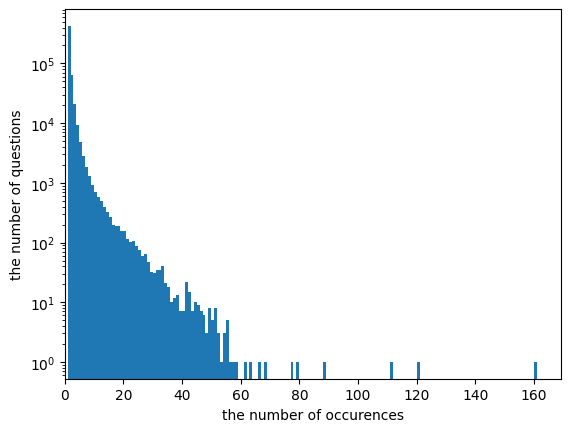

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline


trn_qs_counts = trn_qs.value_counts()
plt.hist(trn_qs_counts, bins=range(trn_qs_counts.max() + 1))
plt.xlim(xmin=0)
plt.xlabel('the number of occurences')
plt.ylabel('the number of questions')
plt.yscale("log")

In [18]:
trn_qs_counts.head()

What are the best ways to lose weight?                                             161
How can you look at someone's private Instagram account without following them?    120
How can I lose weight quickly?                                                     111
What's the easiest way to make money online?                                        88
Can you see who views your Instagram?                                               79
Name: count, dtype: int64

In [20]:
tst_qs = pd.Series(tst_df['question1'].to_list() + tst_df['question2'].to_list())
tst_qs_counts = tst_qs.value_counts()
tst_qs_counts.head()

What         2686
How          1848
What is      1212
What are      803
How do        773
Name: count, dtype: int64

In [21]:
tst_qs.head()

0    How does the Surface ...
1    Should I have a hair ...
2    What but is the best ...
3    Which food not emulsi...
4    How "aberystwyth" sta...
dtype: object

In [22]:
trn_df.duplicated(subset=['question1', 'question2']).sum()

0

In [1]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')